=== Head of the Dataset ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4  

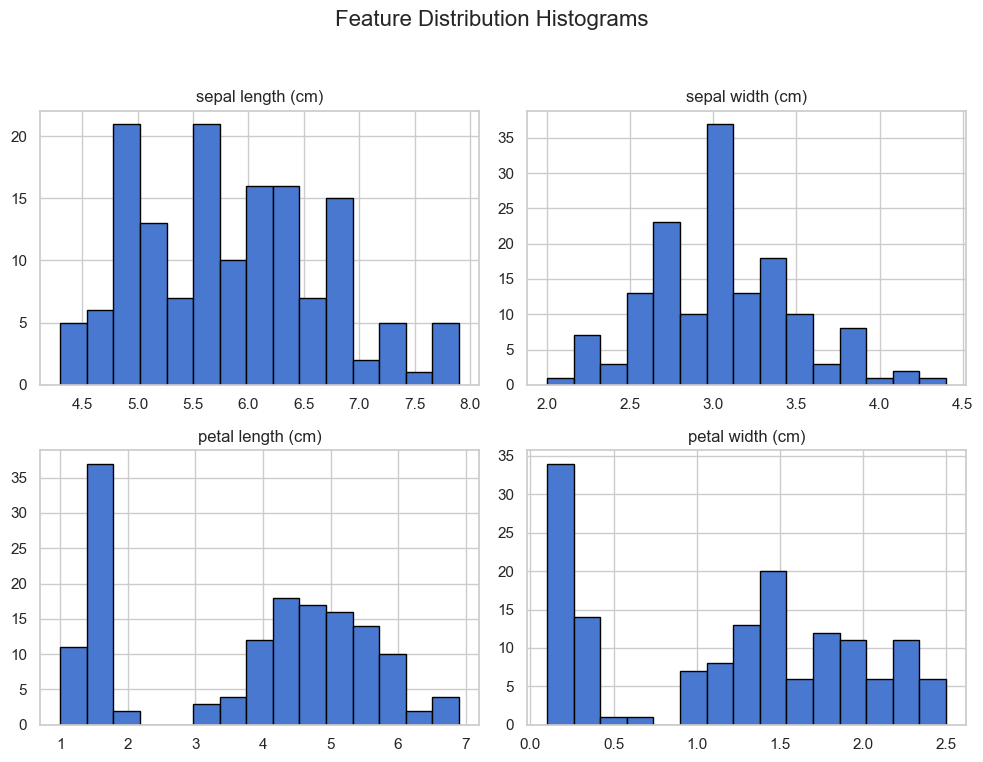

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

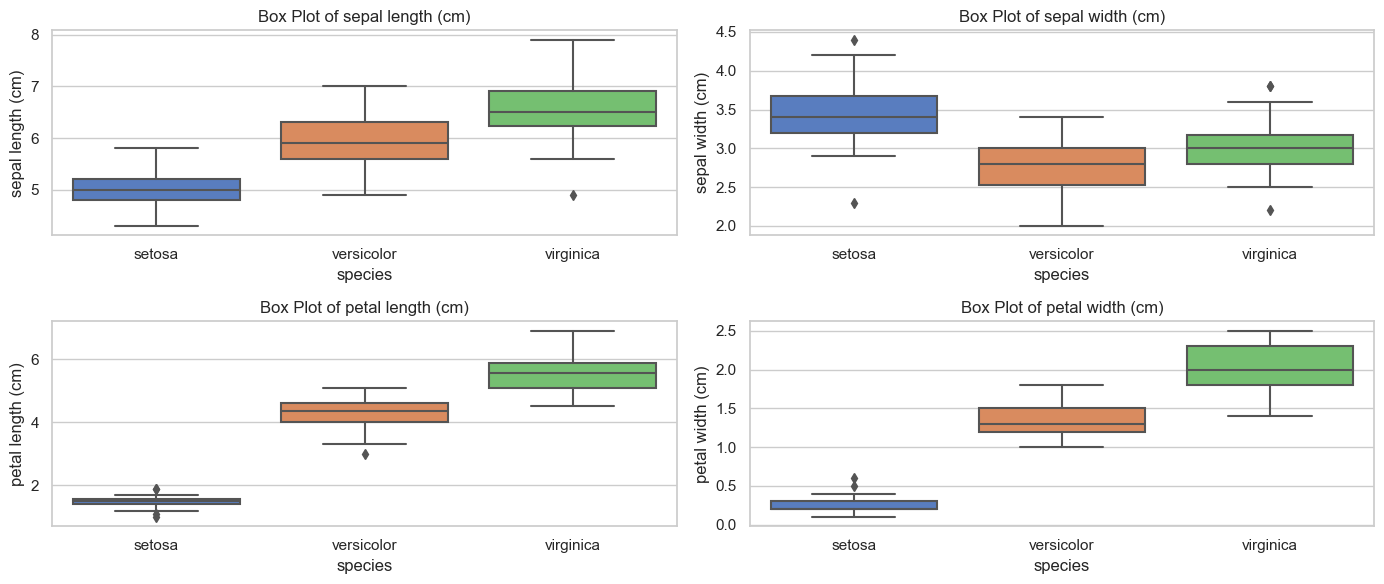

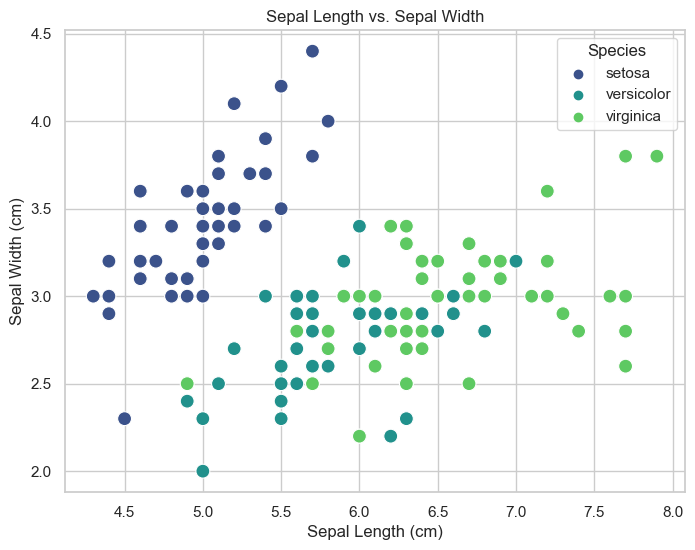

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

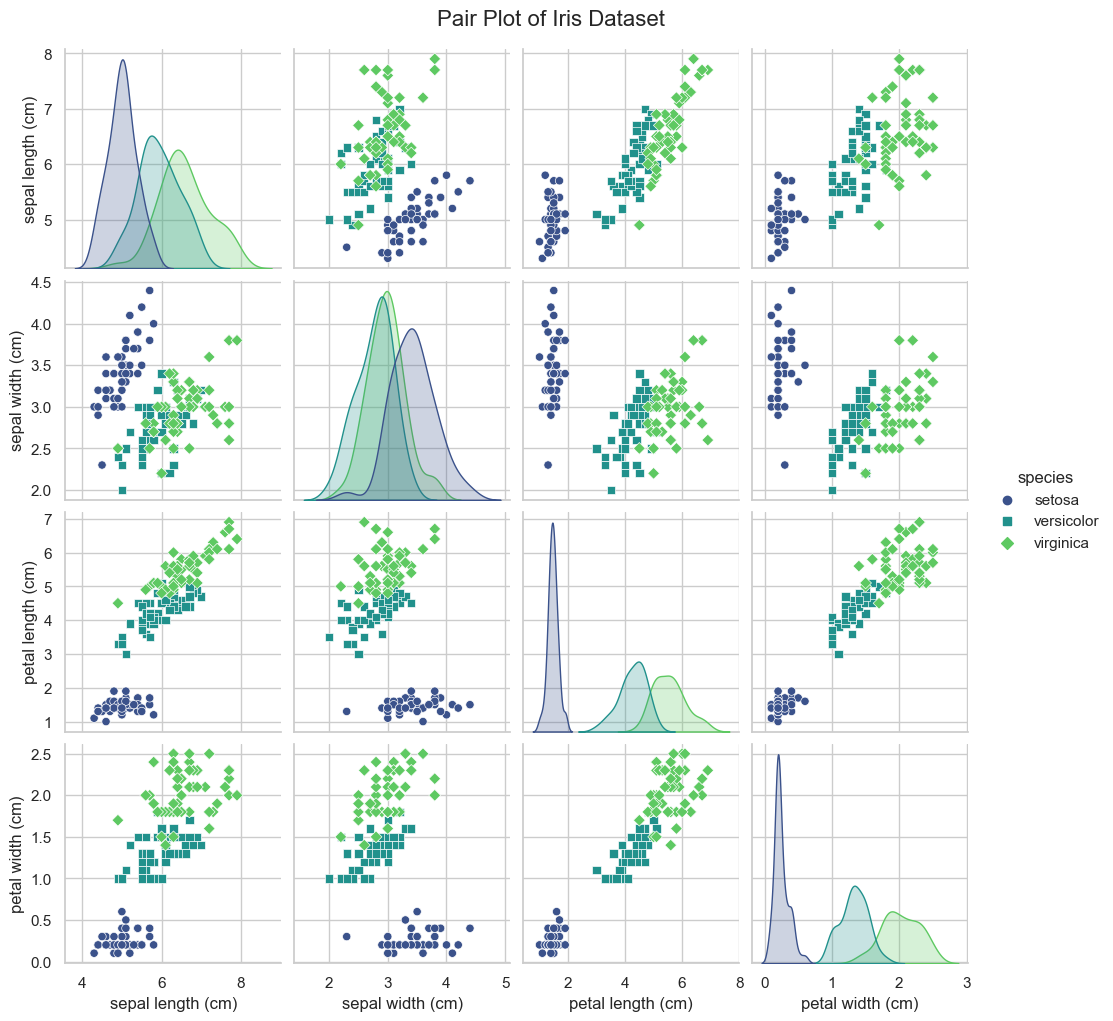

=== Logistic Regression ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Linear Regression (Rounded) ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Explained Variance Ratio by PCA (2 components):
[0.92461872 0.05306648]


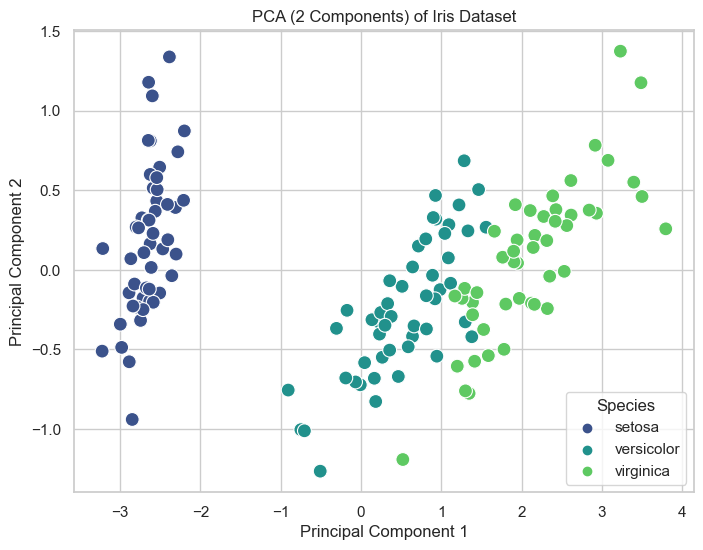

In [ ]:
##Learning ML

# ===========================
# Day 1: Complete Project on the Iris Dataset
# ===========================
#
# In this project you will:
# 1. Load and explore the Iris dataset.
# 2. Perform univariate and multivariate EDA.
# 3. Train and evaluate Logistic Regression and Linear Regression models.
# 4. Apply PCA for dimensionality reduction and visualize the results.
#
# Let's get started!

# ---------------------------
# Section 1: Import Libraries and Load Data
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Set plotting style
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Map the numeric target to species names for easier interpretation
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display initial information
print("=== Head of the Dataset ===")
print(df.head(), "\n")

print("=== Dataset Info ===")
print(df.info(), "\n")

print("=== Summary Statistics ===")
print(df.describe(), "\n")

print("=== Missing Values per Column ===")
print(df.isnull().sum(), "\n")

# ---------------------------
# Section 2: Exploratory Data Analysis (EDA)
# ---------------------------
# -- 2.1 Univariate Analysis --

# Histograms for each feature
df.hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Feature Distribution Histograms", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box Plots by species to examine spread and potential outliers
plt.figure(figsize=(14, 6))
features = iris.feature_names
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=feature, data=df)
    plt.title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()

# -- 2.2 Multivariate Analysis --

# Scatter Plot: Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='species', data=df, palette='viridis', s=100)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title="Species")
plt.show()

# Pair Plot for entire dataset providing pairwise relationships
sns.pairplot(df, hue="species", markers=["o", "s", "D"], palette="viridis")
plt.suptitle("Pair Plot of Iris Dataset", fontsize=16, y=1.02)
plt.show()

# ---------------------------
# Section 3: Machine Learning Models
# ---------------------------
# Prepare features and target
X = iris.data  # Four numeric features
y = iris.target  # Target: 0, 1, 2 corresponding to species

# Split data: 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -- 3.1 Logistic Regression (Classification) --
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("=== Logistic Regression ===")
print("Accuracy: {:.2f}%".format(accuracy_log * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

# -- 3.2 Linear Regression (Forced into Classification) --
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin_cont = linreg.predict(X_test)
# Since linear regression outputs continuous values, round to nearest integer and clip to valid range [0, 2]
y_pred_lin = np.clip(np.round(y_pred_lin_cont), 0, 2).astype(int)

accuracy_lin = accuracy_score(y_test, y_pred_lin)
print("\n=== Linear Regression (Rounded) ===")
print("Accuracy: {:.2f}%".format(accuracy_lin * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_lin))

# ---------------------------
# Section 4: Dimensionality Reduction with PCA
# ---------------------------
# Apply PCA to reduce the feature space to 2 dimensions for visualization.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(iris.data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Add species names for coloring the plots easily
pca_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("\nExplained Variance Ratio by PCA (2 components):")
print(pca.explained_variance_ratio_)

# 2D Scatter Plot of PCA Components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis', s=100)
plt.title("PCA (2 Components) of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.show()

# ===========================
# End of Day 1 Code
# ===========================

In [1]:
# ---------------------------
# Section 1: Import Libraries and Load Data
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [2]:
# Set plotting style
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Map the numeric target to species names for easier interpretation
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [3]:
# Display initial information
print("=== Head of the Dataset ===")
print(df.head(), "\n")

print("=== Dataset Info ===")
print(df.info(), "\n")

print("=== Summary Statistics ===")
print(df.describe(), "\n")

print("=== Missing Values per Column ===")
print(df.isnull().sum(), "\n")

=== Head of the Dataset ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4  

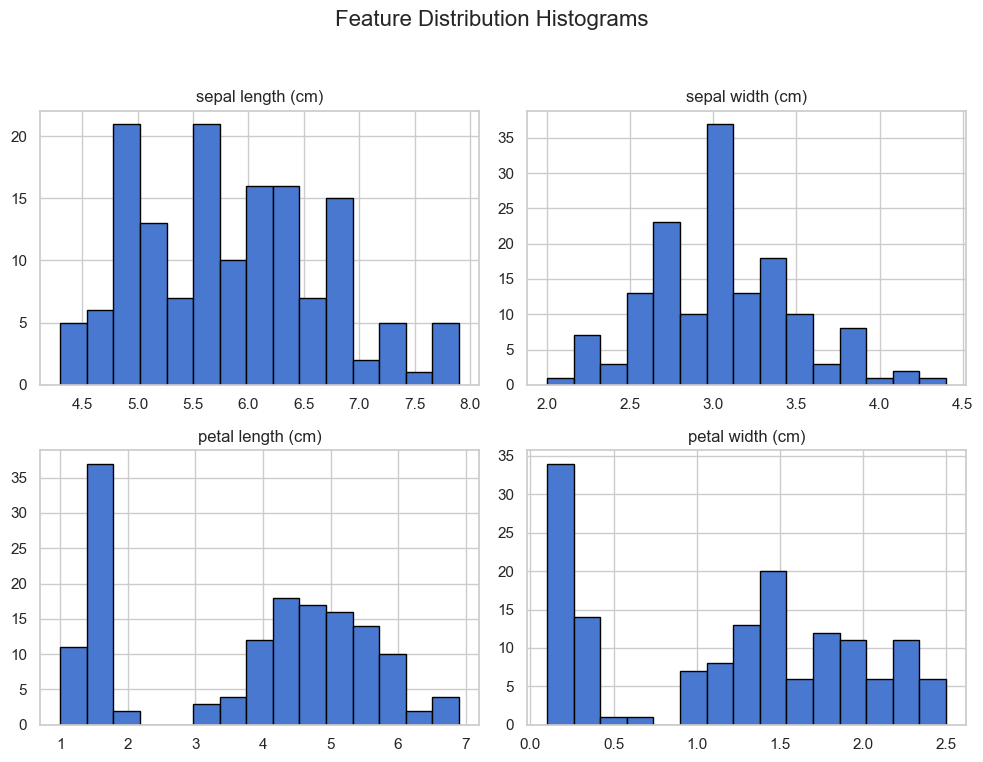

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

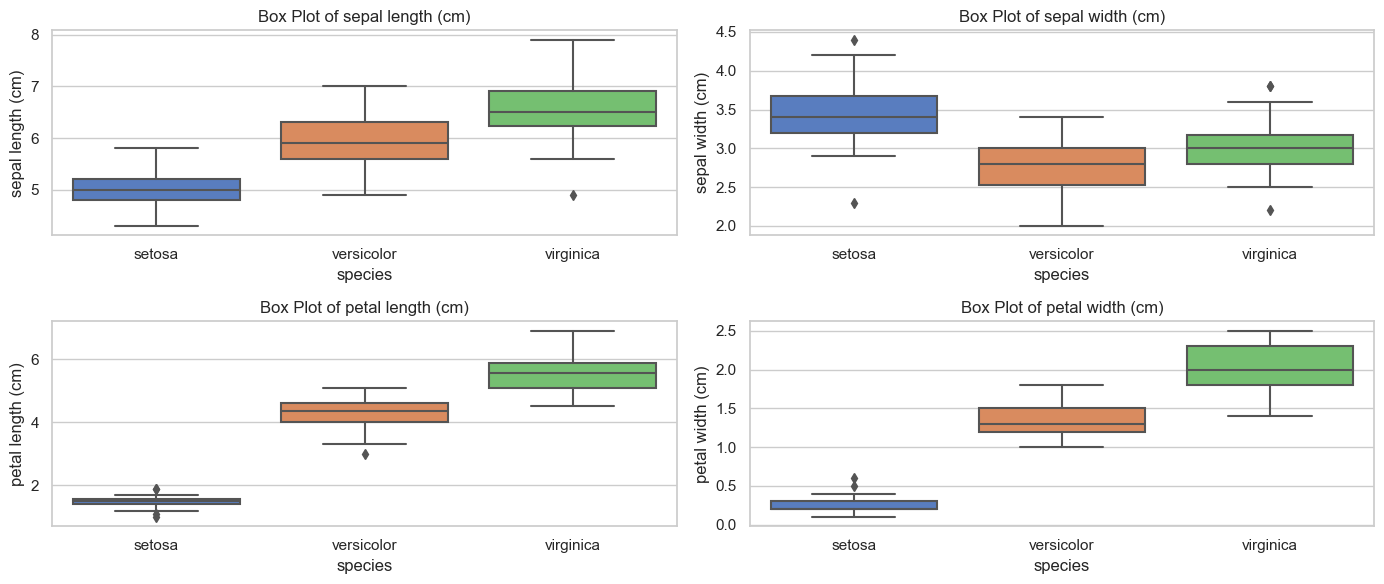

In [5]:
# ---------------------------
# Section 2: Exploratory Data Analysis (EDA)
# ---------------------------
# -- 2.1 Univariate Analysis --

# Histograms for each feature
df.hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Feature Distribution Histograms", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box Plots by species to examine spread and potential outliers
plt.figure(figsize=(14, 6))
features = iris.feature_names
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=feature, data=df)
    plt.title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()

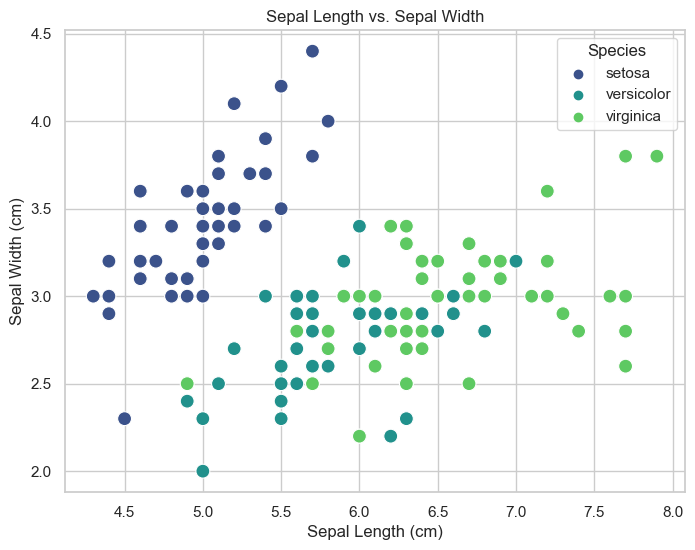

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

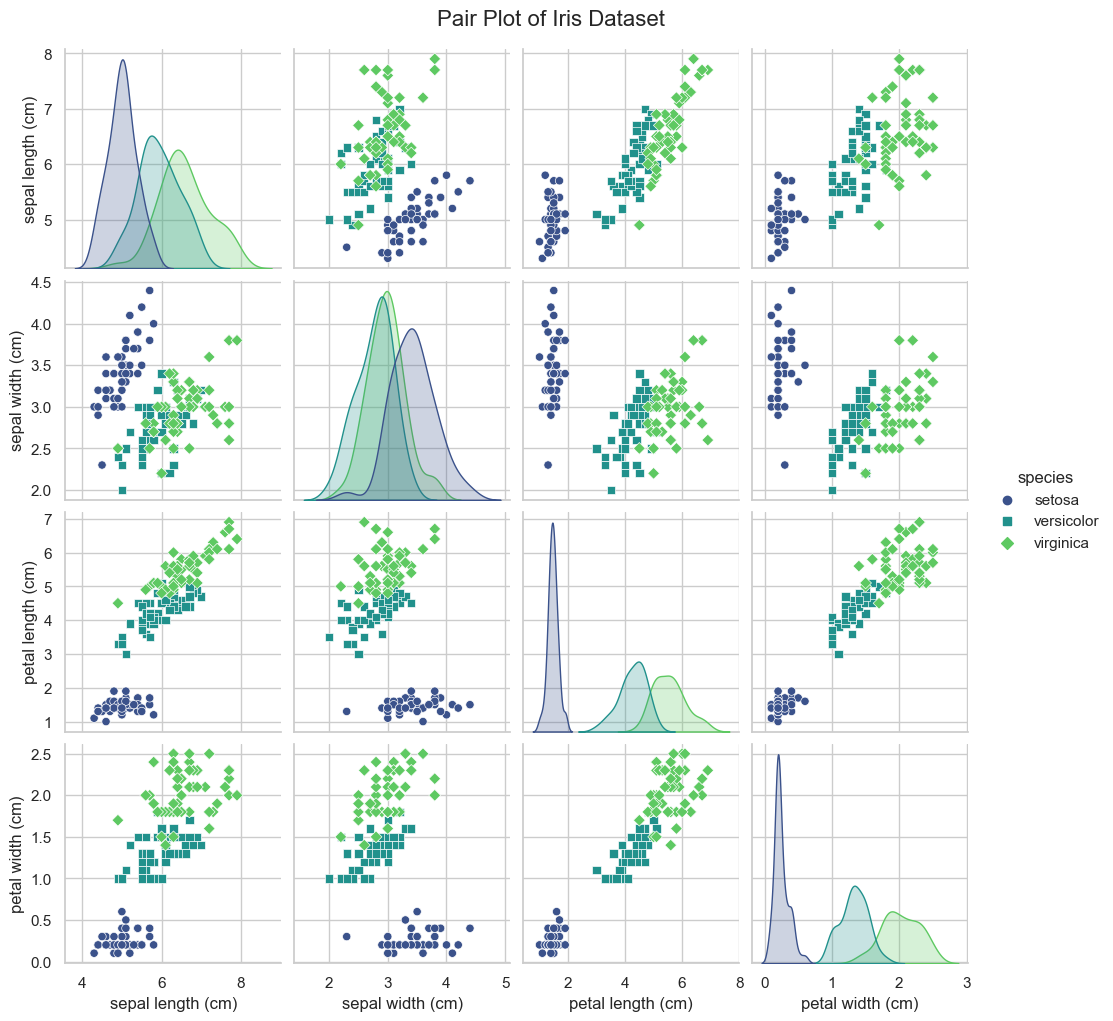

In [6]:
# -- 2.2 Multivariate Analysis --

# Scatter Plot: Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='species', data=df, palette='viridis', s=100)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title="Species")
plt.show()

# Pair Plot for entire dataset providing pairwise relationships
sns.pairplot(df, hue="species", markers=["o", "s", "D"], palette="viridis")
plt.suptitle("Pair Plot of Iris Dataset", fontsize=16, y=1.02)
plt.show()

In [7]:
# ---------------------------
# Section 3: Machine Learning Models
# ---------------------------
# Prepare features and target
X = iris.data  # Four numeric features
y = iris.target  # Target: 0, 1, 2 corresponding to species

# Split data: 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# -- 3.1 Logistic Regression (Classification) --
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("=== Logistic Regression ===")
print("Accuracy: {:.2f}%".format(accuracy_log * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

=== Logistic Regression ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [10]:
# -- 3.2 Linear Regression (Forced into Classification) --
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin_cont = linreg.predict(X_test)
# Since linear regression outputs continuous values, round to nearest integer and clip to valid range [0, 2]
y_pred_lin = np.clip(np.round(y_pred_lin_cont), 0, 2).astype(int)

accuracy_lin = accuracy_score(y_test, y_pred_lin)
print("\n=== Linear Regression (Rounded) ===")
print("Accuracy: {:.2f}%".format(accuracy_lin * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred_lin))


=== Linear Regression (Rounded) ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




Explained Variance Ratio by PCA (2 components):
[0.92461872 0.05306648]


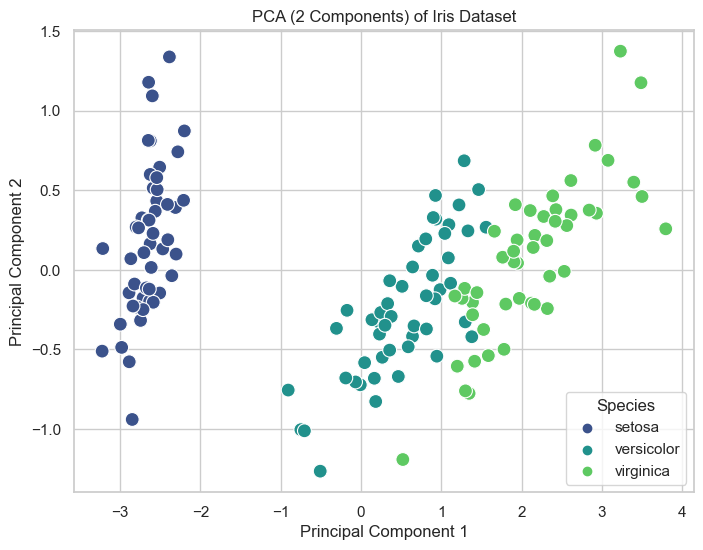

In [11]:
# ---------------------------
# Section 4: Dimensionality Reduction with PCA
# ---------------------------
# Apply PCA to reduce the feature space to 2 dimensions for visualization.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(iris.data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Add species names for coloring the plots easily
pca_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("\nExplained Variance Ratio by PCA (2 components):")
print(pca.explained_variance_ratio_)

# 2D Scatter Plot of PCA Components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis', s=100)
plt.title("PCA (2 Components) of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.show()

# ===========================
# End of Day 1 Code
# ===========================

# Applying t-SNE

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

In [13]:
# Load Iris dataset
iris = load_iris()
X = iris.data 
y = iris.target

# Create a Dataframe for viz
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

In [14]:
tsne = TSNE(n_components=2,random_state=42,perplexity=30)
tsne_results = tsne.fit_transform(X)

In [15]:
# Create a DataFrame for t-SNE results
df_tsne = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['species'] = df['species']

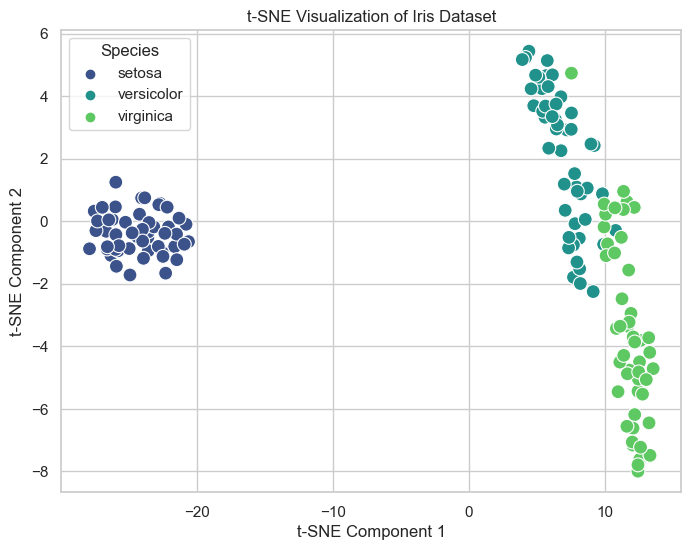

In [16]:
# Plot t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='species', data=df_tsne, palette='viridis', s=100)
plt.title("t-SNE Visualization of Iris Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Species")
plt.show()